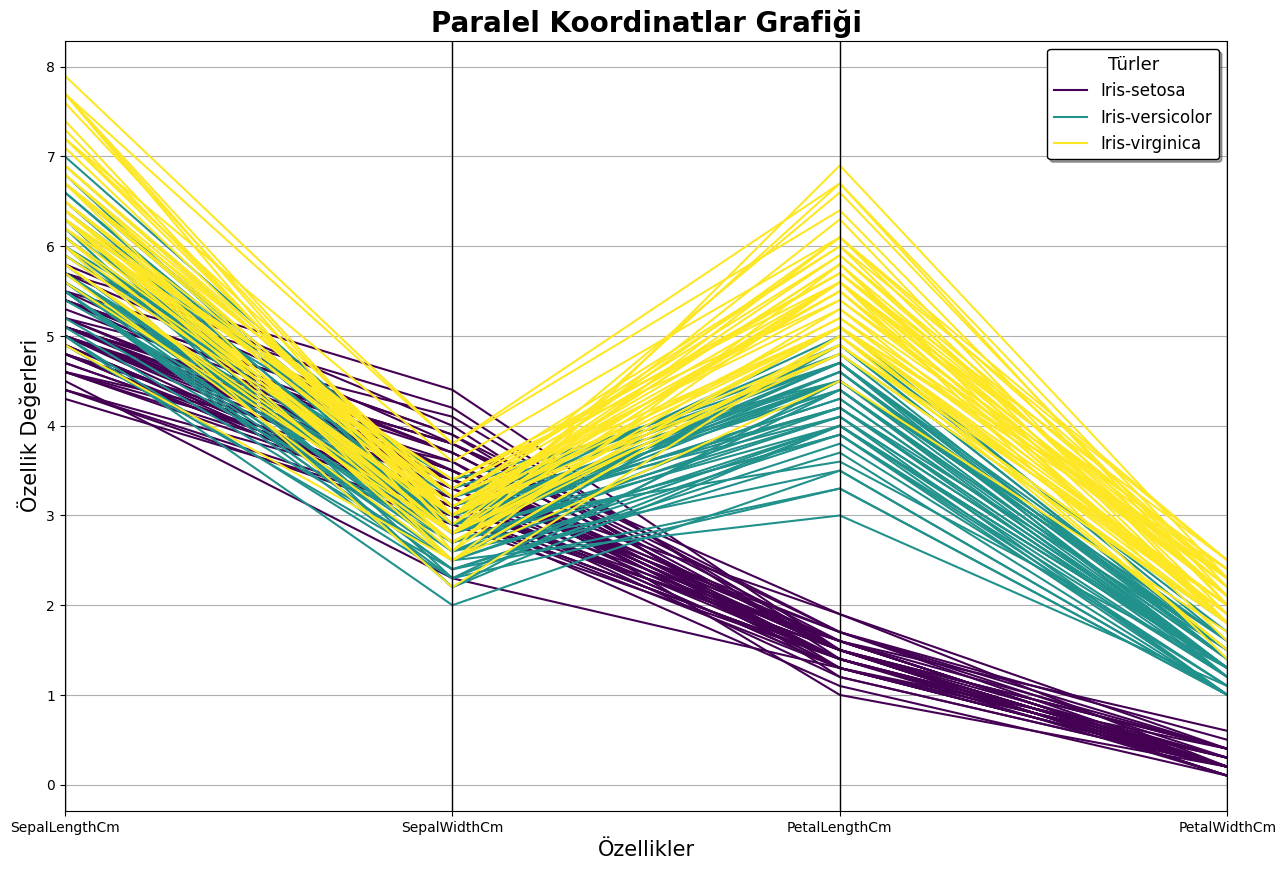

Doğruluk: 1.00


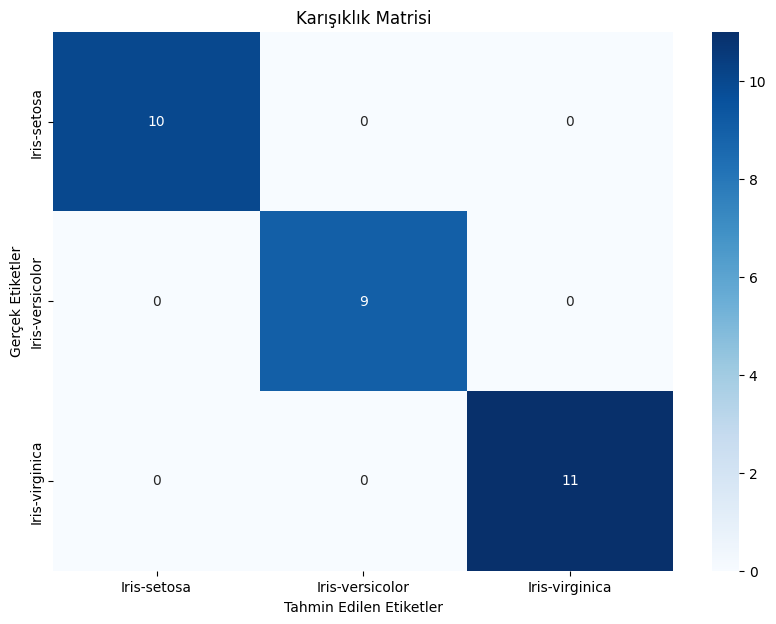

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

dataset = pd.read_excel('Iris.xlsx')

feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Özellikleri tek tek once strye çevirir, virgül yerine nokta koyar ve sonra tekrar floata çevirir. 
# nokta yapmamızın nedeni python ondalık aracı olarak nokta kullanır
for col in feature_columns:
    dataset[col] = dataset[col].astype(str).str.replace(',', '.').astype(float)

# Paralel koordinatlar grafiği = çok boyutlu verilerin görselleştirilmesi için kullanılan bir teknik
plt.figure(figsize=(15, 10))
parallel_coordinates(dataset, 'Species', cols=feature_columns, colormap=plt.get_cmap("viridis", len(dataset['Species'].unique())))

plt.title('Paralel Koordinatlar Grafiği', fontsize=20, fontweight='bold')
plt.xlabel('Özellikler', fontsize=15)
plt.ylabel('Özellik Değerleri', fontsize=15)

# Legend (açıklama) için tür isimlerini göster
plt.legend(loc='upper right', title='Türler', fontsize=12, title_fontsize='13', frameon=True, shadow=True, facecolor="white", edgecolor="black")
# loc: Açıklamanın grafikte nerede yer alacağını belirler. Örneğin, 'upper right' açıklamanın grafiğin üst sağ köşesinde yer almasını sağlar. 
# Kenarda türler var ya onun seklini belirliyor(frameon = cerceve olup olmadıgını, shadow = golge gibi cerceve kenarlarını karar)
plt.show()

X = dataset[feature_columns]
y = dataset['Species']
# x feature_columns seçme sebebimiz onlarla tahmin yapıcagımız için
# y species seçme sebebimiz tahmin yaptıgımız sey yani speciesi aradıgımız icin y o olcak

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split fonksiyonu, veriyi eğitim ve test setlerine ayırır.
# X ve y veri setlerini alır.
# test_size oranında test seti oluşturur (bu örnekte %20).
# random_state ile rastgelelik kontrolü sağlar.
# Dört set döndürür: X_train, X_test, y_train, y_test.


# Veriyi ölçeklendirme (k nn algoritması mesafe dayalı oldugu icin mesafe hataları olmasın diye olcekllendiriyoruz)
# verilerin her bir özelliğini standart bir dağılımda olacak şekilde dönüştürür: yani, her özelliğin ortalamasını 0 ve standart sapmasını 1 yapar.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# K-NN modelinin oluşturulması ve eğitimi
knn = KNeighborsClassifier(n_neighbors=5)  # Burada 5 en yakın komşuyu kullanıyoruz(genelde basta 5 ile baslanırmış)
knn.fit(X_train, y_train) # modele veriyi ogretiyor

# Test seti üzerinde tahminler yapma
y_pred = knn.predict(X_test)


# Model doğruluğunu hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk: {accuracy:.2f}")


# Karışıklık matrisini hesaplama
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
# heatmap = ısı haritası
# cm = confusion matrix (karısıklık matrisi)
# Annot=true => kareler varya matrixde onun icindeki sayıları goster anlamına geliyor
# fmt='d' => format anlamınna gelir, d sayıların integer halinde gosterilmesini saglar
# cmap=> color map
# KNN modelini eğittiğinizde (fit), model, eğitim veri kümesindeki sınıf etiketlerini öğrenir ve bu etiketleri knn.classes_ attribute'unda saklar

plt.xlabel('Tahmin Edilen Etiketler')
plt.ylabel('Gerçek Etiketler')
plt.title('Karışıklık Matrisi')
plt.show()